<a href="https://colab.research.google.com/github/suzannastep/compbio-tutorial/blob/master/S3F/GeneticCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We are going to use the computer to decode the gene from the worksheet. Specifically, we're going to use some code in the Python programming language.
Python has lots of useful "libraries" of helpful bits of pre-written code called "functions." The code below allow us to access the pre-written functions we will need.

In [1]:
#Import the libraries we need to use code from
import pandas as pd
import numpy as np
import requests
from itertools import zip_longest
from matplotlib import pyplot as plt

Next, we're going to create a chart that tells us how to decode the data. We'll be basing our chart on a chart found at this [link](https://raw.githubusercontent.com/suzannastep/compbio-tutorial/master/S3F/CodonTable.txt). We will use some functions from a library called "Pandas" to read this chart into our code.

In [2]:
#Read a file that contains the codon translation table and create a Data Frame
master = "https://raw.githubusercontent.com/suzannastep/compbio-tutorial/master/S3F/CodonTable.txt"
codon_table = requests.get(master)
codon_table = codon_table.text
codon_table = np.array([[st.split('\t')][0][:4] for st in codon_table.split("\n")][2:-1])
codon_table = pd.DataFrame(codon_table[:,:-4:-1],index=codon_table[:,0],columns=["Amino Acid","1 Letter Code","3 Letter Code"])

Next, we want our chart to reflect the colored beads we're going to use! We make a list of the different colors we want to correspond to different amino acids, and end up with a pretty, color-coded chart!

In [3]:
#decide how different codons will be different colors
needed_codons = ['D', 'E', 'G', 'I', 'M', 'N', 'V', 'Y']
other_codons = [c for c in codon_table["1 Letter Code"].unique() if c not in needed_codons]
all_codons = needed_codons + other_codons
# TODO fill in the bead colors
colors = ["white","orange","green","yellow","purple","pink","light blue","dark blue","black","ivory"]
colormap = {}
for color,codon in zip_longest(colors,all_codons,fillvalue=""):
  colormap[codon] = color.title()
codon_table["Bead Color"] = [colormap[codon] for codon in codon_table["1 Letter Code"]]
#make the table of codons color-coded
pd.set_option('display.max_rows', None)
def color_table(v,props=''):
  return props if len(v)==0 else props+"background-color: "+v.lower().replace(" ","")
codon_table.style.applymap(color_table,props="")

,Amino Acid,1 Letter Code,3 Letter Code,Bead Color
AAA,Lysine,K,Lys,Black
AAC,Asparagine,N,Asn,Pink
AAG,Lysine,K,Lys,Black
AAT,Asparagine,N,Asn,Pink
ACA,Threonine,T,Thr,Ivory
ACC,Threonine,T,Thr,Ivory
ACG,Threonine,T,Thr,Ivory
ACT,Threonine,T,Thr,Ivory
AGA,Arginine,R,Arg,
AGC,Serine,S,Ser,


Next, we will write our own function to decode the sequence! Just like we were using functions from other libraries before, we can write our own function so that we have a chunk of code that we can use over and over again with different inputs. 

In our case, the inputs to our function will be the DNA sequence, whether or not we want the computer to say what it's doing as it goes along, and whether or not we want to create a pretty picture of our bracelet at the end.

This function identifies each codon in the DNA sequence, and then uses the chart we created above to identify the associated amino acid (and bead color!!). 

In [4]:
def decode_sequence(sequence,verbose=False,make_bracelet=True):
  """
  Given a DNA sequence, decodes it into a sequence of amino acids,
  as represented by their 1 letter codes.

  Inputs: 
    sequence
      A string of DNA
    verbose
      Either `True` or `False`. If true, the function prints out extra 
      information as it goes along. 
    make_bracelet
      Either `True` or `False`. If true, the function will make 
      a picture of the bracelet.
  
  Output: 
  """
  #Decide how many codons are in the sequence
  how_many_codons = len(sequence)//3
  #Print out a report if we're asked to
  if verbose:
    print("How many codons are there?",how_many_codons)
  #initialize an empty picture for the bracelet
  if make_bracelet:
    fig, ax = plt.subplots(figsize=(15,1)) 
  #initialize an empty chain of amino acids
  amino_acid_chain= []
  #For each codon in the sequence...
  for codon_number in range(how_many_codons):
    #pick out the codon from the sequence
    codon = sequence[3*codon_number:3*codon_number+3]
    #get the 1 letter code and bead color
    amino_acid = codon_table.loc[codon.upper(),"1 Letter Code"]
    amino_acid_color = codon_table.loc[codon.upper(),"Bead Color"]
    #add the amino acid to the chain
    amino_acid_chain.append(amino_acid)
    #Print out a report
    if verbose:
        print("\nCodon Number:\t",codon_number+1)
        print("Codon:\t\t",codon.upper())
        print("Amino Acid:\t",codon_table.loc[codon.upper(),"Amino Acid"])
        print("1 Letter Code:\t",amino_acid)
        print("Bead Color:\t",amino_acid_color)
    #Draw a bead on our picture
    if make_bracelet:
      #tell the computer all the details about the circle we want to draw
      bead = plt.Circle((codon_number, 0),#x,y position of center of circle
                        0.5, #radius
                        facecolor=amino_acid_color.lower().replace(" ",""),#color
                        edgecolor="black",#black line around it
                        alpha=0.7)#make the circle a little transparent
      ax.add_patch(bead) #actually draw the circle
      ax.text(codon_number,0,#x,y position of the text
              amino_acid,#variable containing the text
              fontsize=20,#size of the text 
              color="black",#color of the text 
              horizontalalignment='center',#center the text horizontally
              verticalalignment='center')#center the text vertically
  #show the bracelet
  if make_bracelet:
    plt.axis("equal")
    plt.axis("off")
    plt.show()
  return "".join(amino_acid_chain)

Now, let's see how our function works! Below we use the function `decode_sequence` on the sequence from the worksheet. We tell the function we want it to say what it's doing as it goes along, and we also want it to make a picture of the bracelet.

How many codons are there? 12

Codon Number:	 1
Codon:		 GAA
Amino Acid:	 Glutamic_acid
1 Letter Code:	 E
Bead Color:	 Orange

Codon Number:	 2
Codon:		 AAC
Amino Acid:	 Asparagine
1 Letter Code:	 N
Bead Color:	 Pink

Codon Number:	 3
Codon:		 ATG
Amino Acid:	 Methionine
1 Letter Code:	 M
Bead Color:	 Purple

Codon Number:	 4
Codon:		 GAG
Amino Acid:	 Glutamic_acid
1 Letter Code:	 E
Bead Color:	 Orange

Codon Number:	 5
Codon:		 AAC
Amino Acid:	 Asparagine
1 Letter Code:	 N
Bead Color:	 Pink

Codon Number:	 6
Codon:		 GAT
Amino Acid:	 Aspartic_acid
1 Letter Code:	 D
Bead Color:	 White

Codon Number:	 7
Codon:		 GAA
Amino Acid:	 Glutamic_acid
1 Letter Code:	 E
Bead Color:	 Orange

Codon Number:	 8
Codon:		 AAT
Amino Acid:	 Asparagine
1 Letter Code:	 N
Bead Color:	 Pink

Codon Number:	 9
Codon:		 ATT
Amino Acid:	 Isoleucine
1 Letter Code:	 I
Bead Color:	 Yellow

Codon Number:	 10
Codon:		 GTG
Amino Acid:	 Valine
1 Letter Code:	 V
Bead Color:	 Light Blue

Codon Number:	 11
Codon:		 TAT
Am

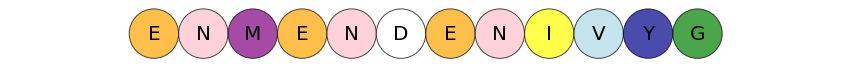

'ENMENDENIVYG'

In [5]:
decode_sequence("gaaaacatggagaacgatgaaaatattgtgtatggt",verbose=True,make_bracelet=True)

Challenge question: What happens to the chain of amino acids if we change a few base-pairs in the sequence? Try removing, adding or changing letters in the input sequence and seeing what happens! Remember, every letter in the input sequence must be either `g`,`c`,`a` or `t`.

(Hint: drawing the bracelet isn't a great idea here because we don't have enough colors of beads for every type of amino acid.)

In [ ]:
decode_sequence("gaaaacatggagaacgatgaaaatattgtgtatggt",verbose=True,make_bracelet=False)